In [1]:
import torch
import torchvision
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda', index=0)

In [3]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [4]:
cd /gdrive/MyDrive/colab/Computer_Vision

/gdrive/MyDrive/colab/Computer_Vision


In [ ]:
#darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15054, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 15054 (delta 19), reused 35 (delta 15), pack-reused 15002
Receiving objects: 100% (15054/15054), 13.45 MiB | 5.55 MiB/s, done.
Resolving deltas: 100% (10217/10217), done.
Checking out files: 100% (2028/2028), done.


In [ ]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('darknet/data/person_search/frames.zip')
fantasy_zip.extractall('darknet/data/person_search/frames')
 
fantasy_zip.close()

In [5]:
cd /gdrive/MyDrive/colab/Computer_Vision/darknet/data/person_search/

/gdrive/MyDrive/colab/Computer_Vision/darknet/data/person_search


In [9]:
from scipy import io
mat_file = io.loadmat('ID_train.mat')

In [14]:
len(mat_file['ID_train'][0])

483

In [6]:
train_img_set = []
train_label_set = []
for row in mat_file['img_index_train'] :
    train_img_set.append(row[0][0]+'.jpg')
    train_label_set.append(row[0][0]+'.txt')

In [7]:
len(train_img_set)

5704

In [ ]:
cd /gdrive/MyDrive/colab/Computer_Vision/darknet/

/gdrive/MyDrive/colab/Computer_Vision/darknet


In [ ]:
#트레이닝 텍스트파일 만들기
f = open("data/person_search/train.txt", 'w')

path = "/gdrive/MyDrive/colab/Computer_Vision/darknet/data/person_search/frames/"

for train_img_name in train_img_set :
    f.write(path + train_img_name +"\n")
f.close()

In [ ]:
#라벨(라벨이름) 텍스트 파일 만들기 
f = open("data/person_search/person.names", 'w')
f.write("person")
f.close()

In [ ]:
#데이터 파일 만들기
f = open("data/person_search/person.data", 'w')
f.write("classes=1" +"\n")
f.write("train=data/person_search/train.txt" +"\n")
f.write("valid=data/person_search/valid.txt" +"\n")
f.write("names=data/person_search/person.names" +"\n")
f.write("backup=backup" +"\n")
f.close()

In [ ]:
cd /gdrive/MyDrive/colab/Computer_Vision

/gdrive/MyDrive/colab/Computer_Vision


In [ ]:
#권한 주기
!chmod +x darknet

In [ ]:
cd /gdrive/MyDrive/colab/Computer_Vision/darknet/

/gdrive/MyDrive/colab/Computer_Vision/darknet


In [ ]:
#컴파일
!make

chmod +x *.sh


In [ ]:
!./darknet detector train data/person_search/person.data cfg/yolov4-custom_person.cfg backup/yolov4-custom_person_last.weights -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.888125), count: 1, class_loss = 2.250778, iou_loss = 8.113975, total_loss = 10.364753 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.885364), count: 5, class_loss = 4.041637, iou_loss = 19.733751, total_loss = 23.775389 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.860874), count: 3, class_loss = 0.016869, iou_loss = 5.586032, total_loss = 5.602901 
 total_bbox = 163765, rewritten_bbox = 0.125790 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.747118), count: 2, class_loss = 2.635444, iou_loss = 45.636623, total_loss = 48.272068 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.806100), count: 9, class_loss = 2.242140, iou_loss = 83.043182, total_loss = 85.285324 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) R

In [ ]:
!./darknet detector test data/person_search/person.data cfg/yolov4-custom_person.cfg backup/yolov4-custom_person_2000.weights data/person_search/frames/c6s2_125318.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF

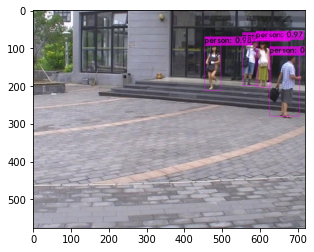

In [ ]:
#이미지 보여주기
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread("predictions.jpg")
plt.imshow(image)
plt.show()